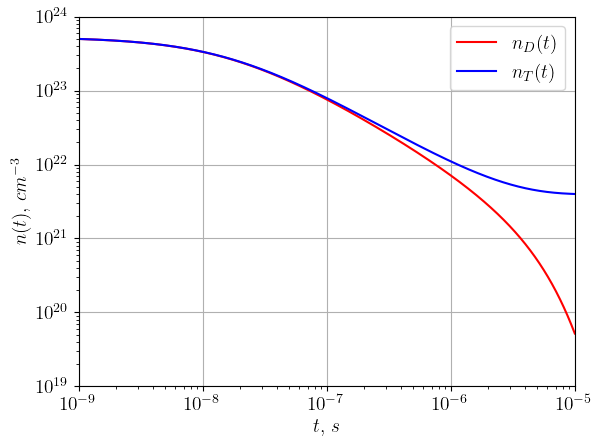

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)
def F(s,t):
    react_dd = 1.2e-18; react_dt = 1.1e-16 # reaction rates in cm^3/sec
    dvdt = -react_dt * s[0] *s[1] - react_dd *s[0] *s[0] / 2
    dudt = -react_dt * s[0] *s[1] + react_dd *s[0] *s[0] / 4
    return [dvdt, dudt]
t = np.linspace(1e-9,1e-5, 100000)
s0=[5e+23,5e+23]
s = odeint(F,s0,t)
fig, ax = plt.subplots()
ax.plot(t,s[:,0],'r-', linewidth=1.5)
ax.plot(t,s[:,1],'b-', linewidth=1.5)
plt.xlabel("$t$, $s$")
plt.ylabel("$n(t)$, $cm^{-3}$")
ax.set(ylim=[1e+19,1e+24], yscale ='log')
ax.set(xlim=[1e-9,1e-5], xscale = 'log')
plt.legend(['$n_{D}(t)$','$n_{T}(t)$' ], loc = 'upper right')
plt.grid()
plt.show()